# Dataset Analysis 2: NA fill techniques

In [1]:
import pandas as pd
import numpy as np
from datasets import *
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()
import scipy.stats as stats

**Columns with NA values**

In [2]:
dogs = load_df_dogs_2016(dropColumns=dropNonNumeric+dropDates+dropDead+dropIrrelevant)
for nacol in dogs.columns[dogs.isnull().any()].tolist():
    print("%s:\t%d" % (nacol, dogs[nacol].isnull().sum()))

Asx/Ao:	1
E:	38
E/A:	43
FE %:	1
FS %:	1


# Fill with column means

In [3]:
dogs = load_df_dogs_2016(NApolicy='mean', dropColumns=dropNonNumeric+dropDates+dropDead+dropIrrelevant)
print("Cols with NAs: %d" % dogs.isnull().any().sum())
print(dogs.shape)

Cols with NAs: 0
(161, 16)


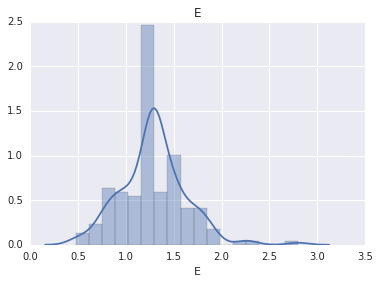

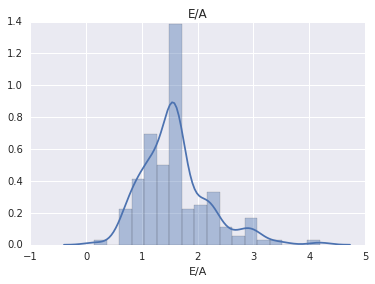

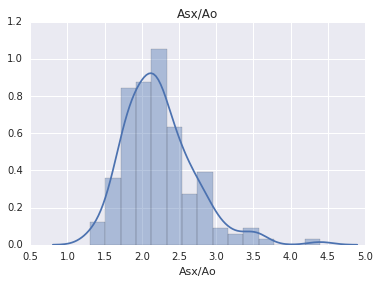

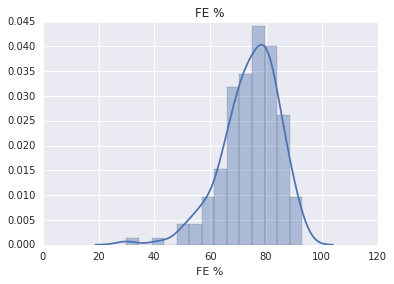

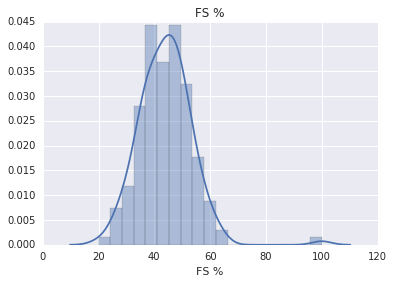

In [4]:
for feat in ["E", "E/A", "Asx/Ao", "FE %", "FS %"]:
    plt.title(feat)
    sns.distplot(dogs[feat])
    plt.show()

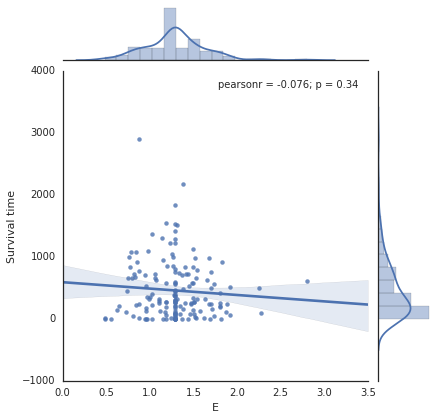

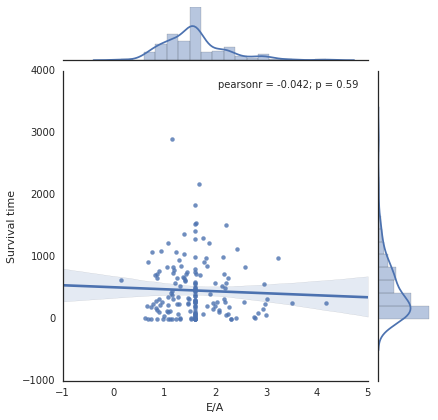

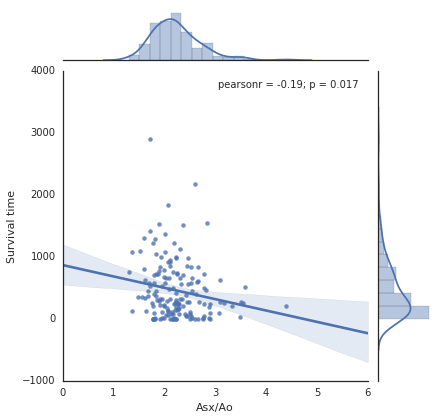

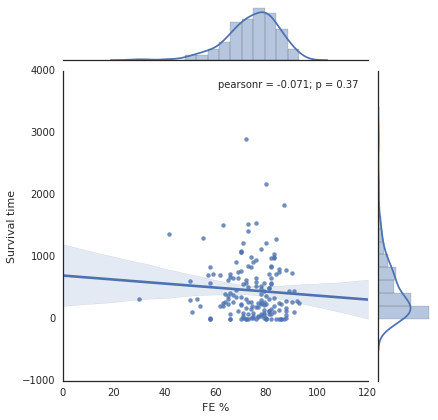

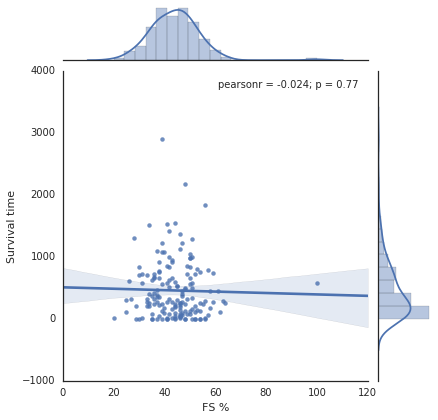

In [5]:
with sns.axes_style('white'):
    for feat in ["E", "E/A", "Asx/Ao", "FE %", "FS %"]:
        sns.jointplot(feat, "Survival time", dogs, kind='reg')
        plt.show()

# Fill NA with generated normal values

Normality checks

In [6]:
dogs = load_df_dogs_2016(NApolicy='drop', dropColumns=dropNonNumeric+dropDates+dropDead+dropIrrelevant)
dogs.shape

(117, 16)

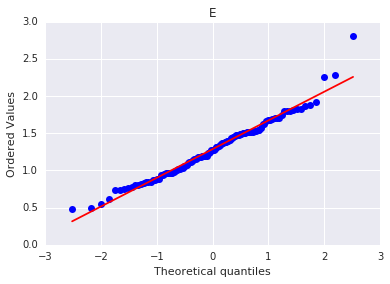

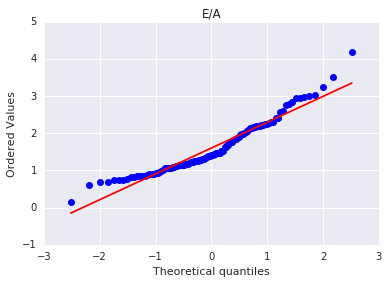

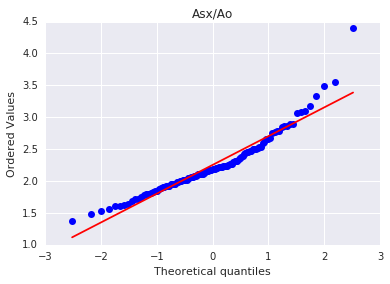

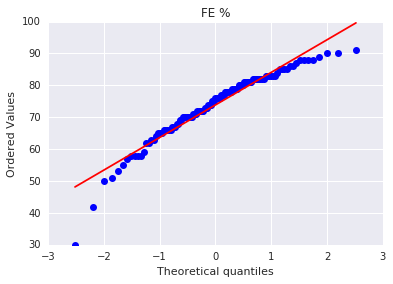

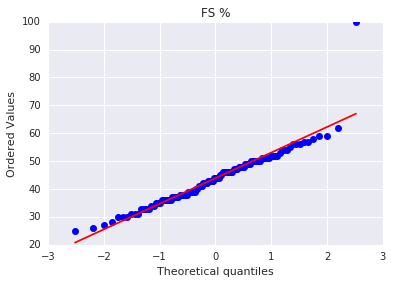

In [7]:
for col in ["E", "E/A", "Asx/Ao", "FE %", "FS %"]:
    stats.probplot(dogs[col], dist="norm", plot=plt)
    plt.title(col)
    plt.show()

Test filling

In [8]:
dogs = load_df_dogs_2016(NApolicy='normal', dropColumns=dropNonNumeric+dropDates+dropDead+dropIrrelevant)
print("Cols with NAs: %d" % dogs.isnull().any().sum())
print(dogs.shape)

Cols with NAs: 0
(161, 16)


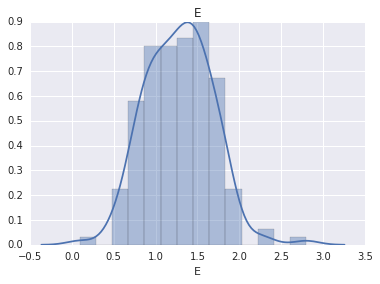

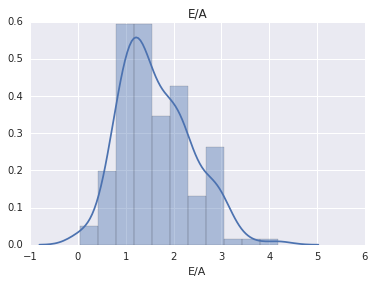

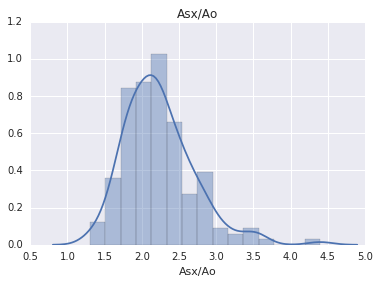

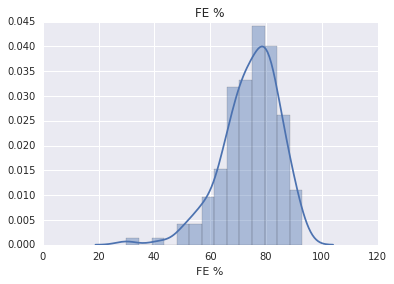

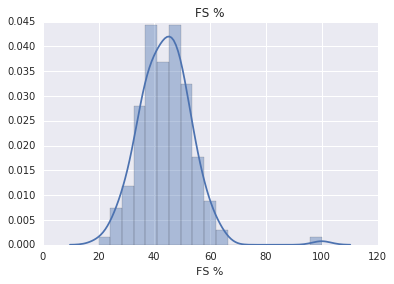

In [9]:
for feat in ["E", "E/A", "Asx/Ao", "FE %", "FS %"]:
    plt.title(feat)
    sns.distplot(dogs[feat])
    plt.show()

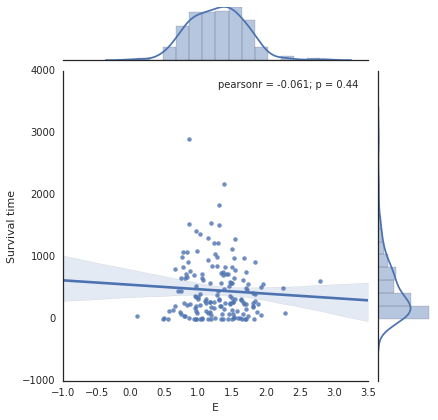

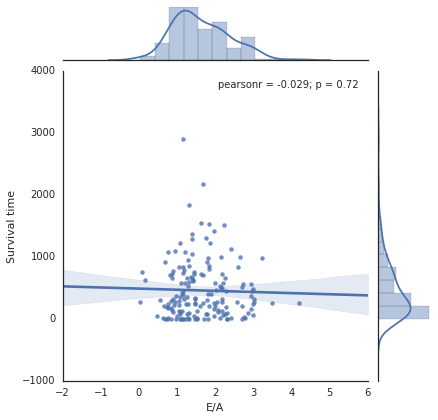

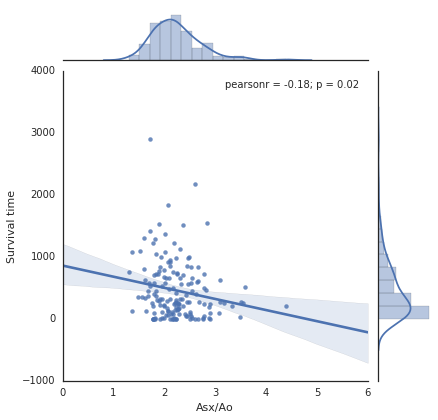

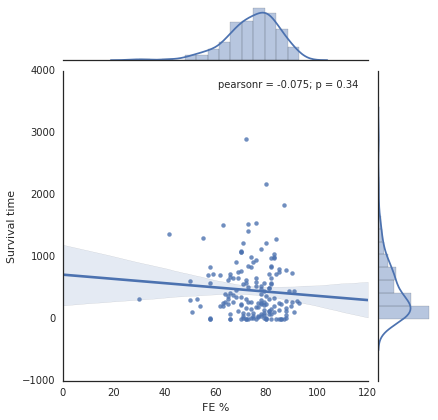

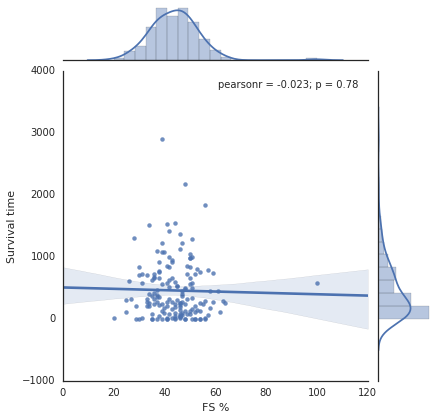

In [10]:
with sns.axes_style('white'):
    for feat in ["E", "E/A", "Asx/Ao", "FE %", "FS %"]:
        sns.jointplot(feat, "Survival time", dogs, kind='reg')
        plt.show()

# (TODO) Fill NA with values predicted using correlated features